#Análisis Exploratorio de la data

Se descargaa Sentencepiece

In [1]:
pip install sentencepiece

     |████████████████████████████████| 1.2 MB 5.2 MB/s 


##Nota: 
Reiniciar el entorno de ejecución antes de continuar

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Se clona el repositorio de git para obtener los archivos csv que contienen los datos

In [3]:
! git clone --recursive https://github.com/Jmazo25/Monografia.git

Cloning into 'Monografia'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


Se leen los datasets de entrenamiento y prueba en formato "csv" para convertirlos a dataframes

In [4]:
train_df = pd.read_csv("/content/Monografia/train.csv")
test_df = pd.read_csv("/content/Monografia/test.csv")

Se visualiza el dataframe creado a partir de la carga del archivos .csv perteneciente al set de datos de entrenamiento

In [5]:
train_df.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


Se visualiza información relevante sobre el dataset además de las observaciones no nulas

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


Se aprecia el dataframe correspondiente a los datos de test:

In [7]:
test_df.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


A continuación se valida cuáles columnas del archivo de entrenamiento tienen campos nulos:

In [8]:
train_df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

Se identifica la fila que contiene los datos nulos, la cual corresponde a la etiqueta "Neutral"

In [9]:
train_df.loc[train_df['text'].isnull()]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


A continuación se procede a eliminar la fila nula, para ello se utilizan las funciones:


*   dropna de pandas: con esta función (y los parámetros del código), eliminamos todas las filas en la que hay algún campo que está vacío.
*   reset_index : función de pandas que permite resetear el índice del dataframe.
*   shape: identificamos la cantidad de filas por cantidad de columnas






In [10]:
# Se eliminarán las filas detectatadas
train_df.dropna(axis = 0, how ='any',inplace=True)
train_df.reset_index(inplace=True)
train_df.shape

(27480, 5)

Se identifican nuevamente la cantidad de nulos, y en efecto, no hay ninguno

In [11]:
train_df.isnull().sum()

index            0
textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

Se realiza el mismo procedimeinto de buscar nulos para los datos de prueba

In [12]:
test_df.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

A continuación se define una función que permita identificar la cantidad de filas que hay por cada uno de los sentimientos:

In [13]:
# función que determina la altura de las barras en el gráfico
def barh(ax): # for getting height
    
    for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x()+ p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))

Se generará un histograma con la distribución de las categorías existentes en la variable "sentimient", en el dataframe de entrenamiento:

In [14]:
sb.set_theme()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


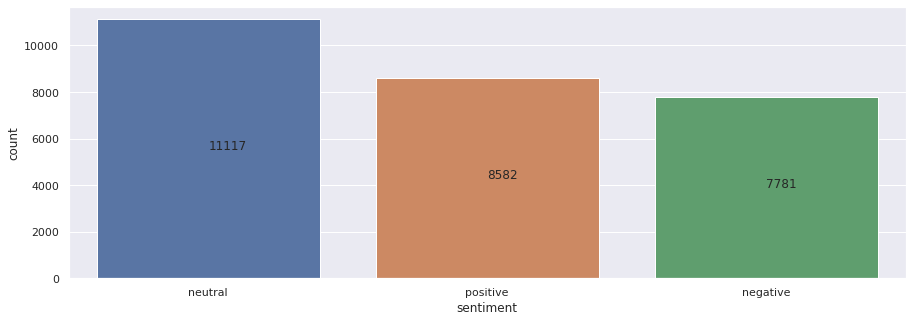

In [15]:
plt.figure(figsize=(15,5))
ax0 = sb.countplot(train_df['sentiment'],order=train_df['sentiment'].value_counts().index)
barh(ax0)
plt.show()

Subsiguiente se validará la distribución por sentimiento del archivo de prueba:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


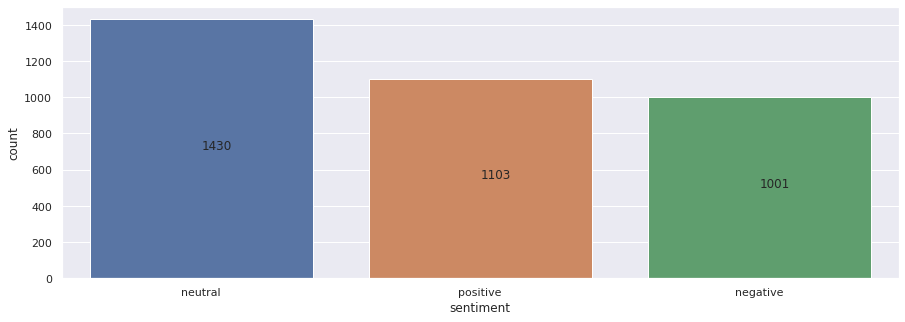

In [16]:
plt.figure(figsize=(15,5))
ax1 = sb.countplot(test_df['sentiment'],order=test_df['sentiment'].value_counts().index)
barh(ax1)
plt.show()

De acuerdo a la observación anterior, la data tanto de entrenamiento como de prueba tiene distribuciones similares, ya que su mayoría está en los neutrales, seguidos por los positivos, y finalmente los negativos.

Ahora se segmentará el dataset de entrenamiento de acuerdo al sentimiento:

In [47]:
positive_selected_text = train_df[train_df['sentiment'] == 'positive']['selected_text']
negative_selected_text = train_df[train_df['sentiment'] == 'negative']['selected_text']
neutral_selected_text = train_df[train_df['sentiment'] == 'neutral']['selected_text']

In [18]:
positive_text = train_df[train_df['sentiment'] == 'positive']['text']
negative_text = train_df[train_df['sentiment'] == 'negative']['text']
neutral_text = train_df[train_df['sentiment'] == 'neutral']['text']

In [19]:
posit= positive_text.copy()
negt= negative_text.copy()
neut= neutral_text.copy()

In [52]:
posits= positive_selected_text.copy()
negts= negative_selected_text.copy()
neuts= neutral_selected_text.copy()

Función que permite hallar la frecuencia de los primeros 6 elementos de un dataset

In [21]:
def freq(posit):
  bow=[]
  for fra in posit:
    fra=fra.lower().split()
    for word in fra:
      bow.append(word)
  s=pd.Series(bow)
  return s.value_counts().head(6)

Frecuencia para los tweets con sentimiento neutral:

In [22]:
freq(neut)

i      4872
to     4119
the    3522
a      2506
my     1992
and    1827
dtype: int64

Frecuencia para los tweets con sentimiento positivo:

In [23]:
freq(posit)

i      3687
the    2982
to     2954
a      2375
you    1759
and    1639
dtype: int64

Frecuencia para los tweets con sentimiento negativo:

In [24]:
freq(negt)

i      4506
to     2870
the    2442
my     2016
a      1803
and    1544
dtype: int64

Se define una función que limpiará los dataset ya segmentados por sentimiento:

In [25]:
def clean(serie):
  def clean_text(t):
    tl = []
    t = t.lower().split()
    for i in t:
      if i not in stopwords.words('english'):
        tl.append(i)
    return " ".join(tl)

  serie= serie.apply((lambda x:re.sub('@[^\s]+','',x)))
  serie = serie.apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
  serie = serie.apply((lambda x: re.sub("'","",x)))
  serie = serie.apply((lambda x: re.sub("`","",x)))
  #Remover stopwords
  serie= serie.apply(lambda x: clean_text(x))

  return serie

Se aplican las funciones anteriores a cada uno de las categorías para la variable texto en el conjunto de entrenamiento

In [49]:
posit=clean(posit)

In [28]:
negt=clean(negt)

In [29]:
neut=clean(neut)

Se descarta la palabra "Im" por que es un pronombre sin significado semántico 

In [43]:
freq(posit)

day        1223
good       1046
love        875
happy       840
im          746
mothers     629
dtype: int64

In [44]:
freq(negt)

im      1237
like     476
dont     469
cant     465
get      436
miss     422
dtype: int64

In [45]:
freq(neut)

im       1069
get       623
go        575
day       503
dont      493
going     479
dtype: int64

Ahora se aplica para la variable 'selected_text'

In [53]:
posits=clean(posits)
negts=clean(negts)
neuts=clean(neuts)

Se descarta la palabra "Im" por que es un pronombre sin significado semántico 

In [51]:
freq(posits)

good      826
happy     730
love      697
day       456
thanks    439
great     364
dtype: int64

In [54]:
freq(negts)

im       454
miss     358
sad      343
sorry    300
bad      246
hate     230
dtype: int64

In [55]:
freq(neuts)

im       1052
get       612
go        568
day       492
dont      483
going     472
dtype: int64